# ATML Sample Project report

## Image classification on FashionMNIST dataset
Goal: Create a model to classify images from 10 classes of FashionMNIST dataset (https://github.com/zalandoresearch/fashion-mnist)

## Approach description

We use a network architecture inspired by Wide-ResNet (https://arxiv.org/abs/1605.07146). We train the network to minimize cross-entropy loss for classification, with decaying learning rate schedule, using Adam optimizer.
We use dropout, weight decay and heavy data augmentation for regularization.

Script for training is in `train.py`, data processing pipeline in `dataset.py`

We used accuracy as a metric to evaluate our solution.

# Results
| Setting | Train accuracy \[\%\]| Test accuracy \[\%\]|
| ------- | -------------------- |---------------------|
| Batch normalization | 99.40                | 94.32               |
| w/o Batch norm      | 99.87                | 91.54               |

### Learning curves

<img src="tensorboard.png" style="width: 600px;"/>

Blue - train loss, Red - validation loss. Overfitting can be observed.

### Example of use

In [1]:
# load the libraries
import torch
from PIL import Image
# load the model
from net import Net
model = Net()
model.load_state_dict(torch.load('mnist_cnn.pt'))
model.eval();

In [2]:
# Load sample image
import numpy as np
image = Image.open('shoe.jpg').convert('L')
image = np.array(image)

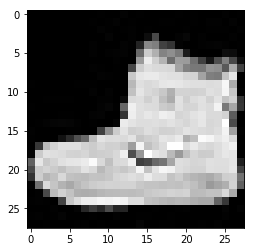

In [3]:
# Show image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')

In [4]:
# Run prediction
label2name = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
with torch.no_grad():
    out = model((torch.Tensor(image).view(1,1,28,28)/255-0.5)/0.5)
    out = torch.softmax(out, -1)

In [5]:
ind = out[0].cpu().numpy().argmax()
print('Prediction: {}, score: {:.4f}'.format(label2name[ind], out[0][ind]))

Prediction: Ankle boot, score: 0.9547


# Sample test set errors

In [6]:
from torchvision import datasets, transforms
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])),
    batch_size=32, shuffle=False)

In [7]:
predictions = []
prediction_scores = []
labels = []
for data, target in test_loader:
    labels.extend(target)
    with torch.no_grad():
        output = model(data)
        output = torch.softmax(output, -1)
    output = output.cpu().numpy()
    preds = output.argmax(-1)
    predictions.extend(preds)
    prediction_scores.extend(output[np.arange(output.shape[0]), preds])

In [8]:
error_indices = np.where(np.array(labels) != np.array(predictions))[0]

In [9]:
def show_sample_mistake(error_indices, labels, predictions, prediction_scores):
    ind = np.random.choice(error_indices)
    plt.imshow(test_loader.dataset.test_data[ind], cmap='gray')
    plt.title('True label: {}\n Prediction: {}\n Score: {:.6f}'.format(label2name[labels[ind].item()],
                                                                    label2name[predictions[ind].item()],
                                                                    prediction_scores[ind]))

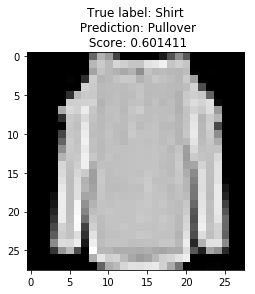

In [10]:
show_sample_mistake(error_indices, labels, predictions, prediction_scores)

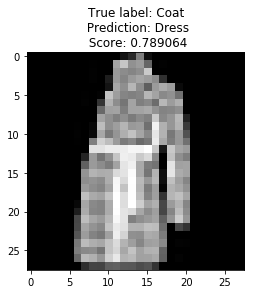

In [11]:
show_sample_mistake(error_indices, labels, predictions, prediction_scores)

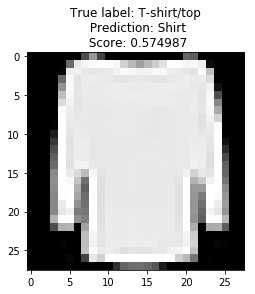

In [12]:
show_sample_mistake(error_indices, labels, predictions, prediction_scores)